In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
donations = pd.read_csv('valid_donation.csv')
non_dup_donations = donations.drop_duplicates(subset=['_projectid'], keep='first')
# donations._donor_acctid.unique()
print(len(donations))
print(len(non_dup_donations))
print(len(donations['_projectid'].unique()))
print(len(non_dup_donations['_projectid'].unique()))
print(len(donations._donor_acctid.unique()))

4570713
966621
966621
966621
597914


In [117]:
print(type(non_dup_donations))
print(len(non_dup_donations))
print(non_dup_donations['_donor_acctid'])

<class 'pandas.core.frame.DataFrame'>
966621
0          22c50856b0824db76daf527da6af9abf
1          c91489d7b6b89943a28555e6add72509
2          01e2385f52c03386ee345c517be8f84e
3          d74f5b847da546427a7de5bc96ab36a6
4          f495e99822acc50e934a57943400bcfe
5          328a087d929740c67d022611d2b7665f
6          3da2caaabc638f2b75b70044fd503474
7          d63c0d8e5b76530d476486e3336e1f3c
8          9cfec1fc8809c8eeabfdbbc1c15c06af
9          ba00327f5429603b82cd877c858b3f4a
10         80c5148505230a7f24812abfbe7c1741
11         b83ea08f81ad5abeeaf37df806f1925a
12         cc21a98fafd4c662f85e8e554e9ae273
13         90a42b859b69d656b60e4583f0469c15
14         e0dd67c660dc50ec1b2dadf37f3c65d4
15         4e769cfd53162200367c7f92419d9321
16         480079fdc7a75ebb135fe1a2f0d15274
17         f00a2c100229d370655841ed8341baed
18         97cc9bb2f9ac369a9590d5ff1fbdab87
19         0d9fd48bf1af1b99c053d6b7c35deb3e
20         aaceb373450edf0f99b2c0351a03c41a
21         7b22083116ec1754e307

In [3]:
# donations = donations.sort_values(['_donor_acctid', 'donation_timestamp'], ascending=[True, True])
valid_donor = pd.read_csv('valid_donor.csv', sep='\t')
print(valid_donor.count())

_donor_acctid    597914
_projectid       597914
dtype: int64


In [51]:
# Testing Start point for donor_list_for_print_1
#project_num = [3]   #starts 284541
#project_num = [4]   #starts 175565
#project_num = [5]   #starts 122679
#project_num = [6]   #starts 92224
#project_num = [7]   #starts 73226
project_num = [8]   #starts 60267
donor_range = valid_donor[valid_donor['_projectid'].isin(project_num)]
print(donor_range)
print(donor_range.count())
print(donor_range.count()/valid_donor.count())

                           _donor_acctid  _projectid
537647  ba4ea8b994fc1bfba97718da50287576         8.0
537648  6b65dfa81b5004472967913a084444eb         8.0
537649  4d6c5f8b43d9d588b669822533d8c7b7         8.0
537650  cc986c75d5541451fb7dfa9c1c7b3b63         8.0
537651  b91e8d2bd7f14c226ab4211e65ba231f         8.0
537652  f5c95555b2f9b50bd28402c1f42e81e1         8.0
537653  72d76460065fbf0e5434a9d57ba36291         8.0
537654  faa2162926fc624d252ecc53a5e1aedc         8.0
537655  edeab3a20cf8c017d0bd8458f92445b8         8.0
537656  502f9468c228c21cf6c99f9233bc81d9         8.0
537657  32c721b9a76274ee05e120b656e953d2         8.0
537658  09a907dc6454e348f592aeb6d9f041fa         8.0
537659  9e7c09b62a148706af5f937627ee55f6         8.0
537660  ba4d8ee0e2e51eef0825238fd4fae5ab         8.0
537661  cc394148424ba77879feac4b6c972647         8.0
537662  8eb559a1b2a84da968a7fa465972864f         8.0
537663  6b35d1735528e41fc3464c7c47bc9ccd         8.0
537664  02b03652a129f593d5f1a0ae9854bf31      

In [141]:
# valid_donor_sorted_by_project_count = valid_donor['_projectid'].sort_values()
#print(type(valid_donor.iloc[-30:]))
# donor_list_for_print = valid_donor.iloc[-300:]['_donor_acctid']
donor_list_for_print_1 = valid_donor.iloc[-50180:-50170]['_donor_acctid']
#print(donor_list_for_print_1.values)

In [146]:
"""
donor_test = donations.loc[donations['_donor_acctid'] == '41d1e5bcc907b51150887d8fe591ffa3']
donor_time_asc = donor_test.sort_values('donation_timestamp', ascending= True)
#print(type(donor_time_asc))

# set first row(first 4 digit) of timestamp as start_yr, last row(first 4 digit) of timestamp as end_yr
start_yr = donor_time_asc['donation_timestamp'].iloc[0][0:4]
end_yr = donor_time_asc['donation_timestamp'].iloc[-1][0:4]
print(type(start_yr))
print(end_yr)
"""

<class 'str'>
2016


In [21]:
"""
import datetime
data_2014 = donor_test[donor_test.donation_timestamp.str.startswith('2014')]
data_2015 = donor_test[donor_test.donation_timestamp.str.startswith('2015')]
data_2016 = donor_test[donor_test.donation_timestamp.str.startswith('2016')]
print(donor_test.shape[0] == data_2014.shape[0] + data_2015.shape[0] + data_2016.shape[0])
print(data_2014._projectid.unique().shape)
print(data_2015._projectid.unique().shape)
print(data_2016._projectid.unique().shape)
print(donor_test._projectid.unique().shape)
"""

True
(17120,)
(14506,)
(6511,)
(35619,)


In [24]:
"""
import datetime
start_year = 2014
end_year = 2016
project_num_arr = []
for year in range(start_year, end_year + 1):
    data = donor_test[donor_test.donation_timestamp.str.startswith(str(year))]
    project_num_arr.append(data._projectid.unique().shape[0])
# print(project_num_arr)
"""

[17120, 14506, 6511]


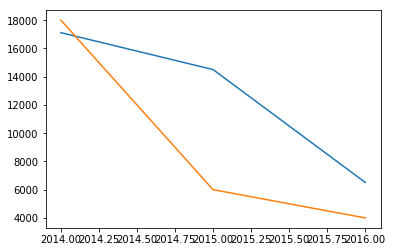

In [44]:
"""
import matplotlib.pyplot as plt
years = [year for year in range(start_year, end_year + 1)]
plt.plot(years, project_num_arr)
"""

In [92]:
def plot_donor_proj(donations, donor_id):
    donor_test = donations.loc[donations['_donor_acctid'] == donor_id]
    donor_time_asc = donor_test.sort_values('donation_timestamp', ascending= True)
    start_yr = donor_time_asc['donation_timestamp'].iloc[0][0:4]
    end_yr = donor_time_asc['donation_timestamp'].iloc[-1][0:4]
    start_year = int(start_yr)
    end_year = int(end_yr)
    T = (end_year - start_year)
    project_num_arr = []
    
    for year in range(start_year, end_year + 1):
        data = donor_test[donor_test.donation_timestamp.str.startswith(str(year))]
        project_num_arr.append(data._projectid.unique().shape[0])
        
    x_years = [year for year in range(1, T + 2)]
    plt.xticks(x_years)
    assert(len(x_years) == len(project_num_arr))
    plt.plot(x_years, project_num_arr)


In [56]:
"""
#Testing Function
donor_test = donations.loc[donations['_donor_acctid'] == '501924fe1699b04a244b546760657991']
donor_time_asc = donor_test.sort_values('donation_timestamp', ascending= True)
start_yr = donor_time_asc['donation_timestamp'].iloc[0][0:4]
end_yr = donor_time_asc['donation_timestamp'].iloc[-1][0:4]
start_year = int(start_yr)
end_year = int(end_yr)
print(start_year)
print(end_year)
T = (end_year - start_year)
print(T)

project_num_arr = []
for year in range(start_year, end_year + 1):
        data = donor_test[donor_test.donation_timestamp.str.startswith(str(year))]
        print(data)
        project_num_arr.append(data._projectid.unique().shape[0])
print(project_num_arr)

x_years = [year for year in range(1, (T+2))]
print(x_years)
"""

In [25]:
"""
def plot_donor_proj_uniq(donations, donor_id):
    donor_test = donations.loc[donations['_donor_acctid'] == donor_id]
    donor_time_asc = donor_test.sort_values('donation_timestamp', ascending= True)
    donor_time_asc = donor_time_asc.drop_duplicates(subset=['_projectid'], keep='first')
    try:
        start_yr = donor_time_asc['donation_timestamp'].iloc[0][0:4]
        end_yr = donor_time_asc['donation_timestamp'].iloc[-1][0:4]
    except:
        print(donor_time_asc['donation_timestamp'].iloc[0])
        print(donor_time_asc['donation_timestamp'].iloc[-1])
    start_year = int(start_yr)
    end_year = int(end_yr)
    project_num_arr = []
    
    for year in range(start_year, end_year + 1):
        data = donor_test[donor_test.donation_timestamp.str.startswith(str(year))]
        project_num_arr.append(data._projectid.unique().shape[0])
        # Add sth here
        
    x_years = [year for year in range(start_year, end_year + 1)]
    plt.xticks(x_years)
    assert(len(x_years) == len(project_num_arr))
    plt.plot(x_years, project_num_arr)
"""

In [167]:
"""
plot_donor_proj(donations, '68c355078d2e13b3d0ec6f887f9bca9c', 2014, 2016)
plot_donor_proj(donations, 'af50cb46f3d253b2f65e07e4ad901453', 2015, 2016)
plot_donor_proj(donations, 'e0dd67c660dc50ec1b2dadf37f3c65d4', 2013, 2016)
plot_donor_proj(donations, '41d1e5bcc907b51150887d8fe591ffa3', 2014, 2016)
"""

"\nplot_donor_proj(donations, '68c355078d2e13b3d0ec6f887f9bca9c', 2014, 2016)\nplot_donor_proj(donations, 'af50cb46f3d253b2f65e07e4ad901453', 2015, 2016)\nplot_donor_proj(donations, 'e0dd67c660dc50ec1b2dadf37f3c65d4', 2013, 2016)\nplot_donor_proj(donations, '41d1e5bcc907b51150887d8fe591ffa3', 2014, 2016)\n"

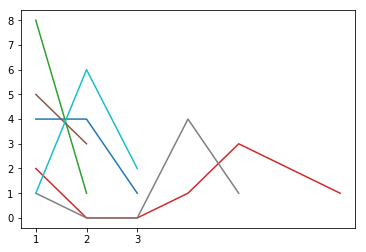

In [142]:
# Unique as each year 
for donor in donor_list_for_print_1.values:
    plot_donor_proj(donations, donor)

IndexError: single positional indexer is out-of-bounds

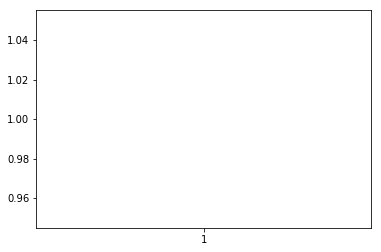

In [104]:
# Unique as lifetime 
for donor in donor_list_for_print_1.values:
    plot_donor_proj(non_dup_donations, donor)

In [ ]:
count = 0

In [113]:
def plot_donor_proj(donations, donor_id):
    donor_test = donations.loc[donations['_donor_acctid'] == donor_id]
    if notdonor_test.empty:
        
    donor_time_asc = donor_test.sort_values('donation_timestamp', ascending= True)
    try:
        start_yr = donor_time_asc['donation_timestamp'].iloc[0][0:4]
        end_yr = donor_time_asc['donation_timestamp'].iloc[-1][0:4]
    except:
        print(donor_test)
        print(donor_time_asc['donation_timestamp'])
        print(donor_time_asc['donation_timestamp'].iloc[-1])
    start_year = int(start_yr)
    end_year = int(end_yr)
    T = (end_year - start_year)
    project_num_arr = []
    
    for year in range(start_year, end_year + 1):
        data = donor_test[donor_test.donation_timestamp.str.startswith(str(year))]
        project_num_arr.append(data._projectid.unique().shape[0])
        
    x_years = [year for year in range(1, T + 2)]
    plt.xticks(x_years)
    assert(len(x_years) == len(project_num_arr))
    plt.plot(x_years, project_num_arr)

UnboundLocalError: local variable 'count' referenced before assignment

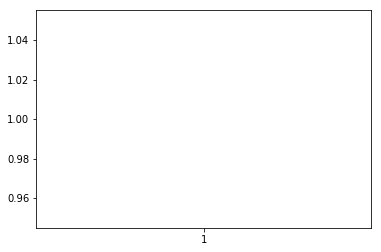

In [114]:
for donor in donor_list_for_print_1.values:
    plot_donor_proj(non_dup_donations, donor)